# Daily precipitation regimes
Here we explore the variability in the distribution of daily precipitation accumulations

In [117]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import pandas as pd
import numpy as np
from src.regions import *
from src.daily import *
from src.plotting import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
pr = load_merged_cmorph_daily()
crh = load_merged_era5_daily_crh()

Text(0, 0.5, 'CMORPH Daily 1x1 Precip [mm/d]')

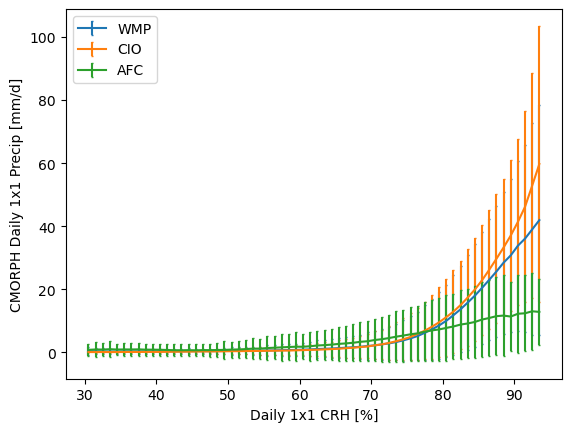

In [129]:
fig, ax = plt.subplots()
for region in [wmp_region(), cio_region(), afc_region()]:
    crh_reg = crh.where(pr > 0, np.nan).sel(region.get_slices())
    pr_reg = pr.where(pr > 0, np.nan).sel(region.get_slices())
    crh_aligned, pr_aligned = xr.align(crh_reg, pr_reg, join='inner')
    crh_bins = np.arange(30, 95, 1)
    
    # Compute mean and standard deviation within each CRH bin
    grouped_pr = pr_aligned.groupby_bins(crh_aligned, bins=crh_bins)
    pr_mean = grouped_pr.mean()
    pr_std = grouped_pr.std()
    
    # Calculate CRH bin midpoints for x-axis plotting
    crh_midpoints = (crh_bins[1:] + crh_bins[:-1]) / 2
    
    # Plot the mean with error bars for ±1 std deviation
    ax.errorbar(crh_midpoints, pr_mean, yerr=pr_std, label=region.name, capsize=1, alpha=1)

ax.legend(loc='upper left')
ax.set_xlabel('Daily 1x1 CRH [%]')
ax.set_ylabel('CMORPH Daily 1x1 Precip [mm/d]')


So now we ask: given some daily CRH or daily precip amount, what does the distribution of system size and intesities look like?

/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_25679/237732997.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_grouped = pf_data.groupby('crh_binned')['data_to_plot']
/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_25679/237732997.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_grouped = pf_data.groupby('crh_binned')['data_to_plot']
/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_25679/237732997.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

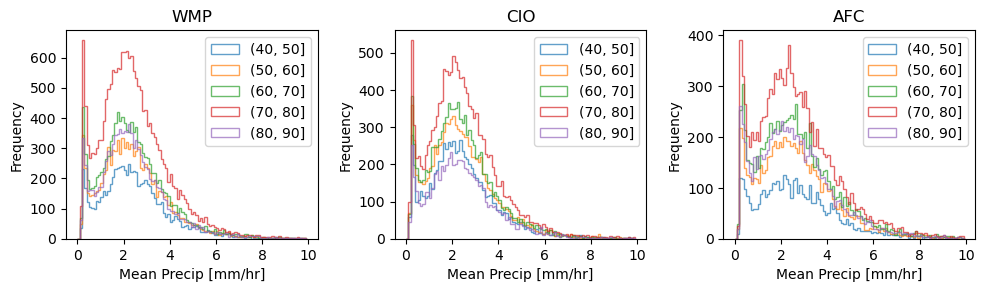

In [121]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 3))

for region, ax in zip([wmp_region(), cio_region(), afc_region()], axs):
    pf_data = load_pf_crh(region.name)
    crh_bins = np.arange(40, 100, 10)
    pf_data['crh_binned'] = pd.cut(pf_data.crh, bins=crh_bins)
    pf_data['data_to_plot'] = pf_data['total_precip']/pf_data['num_pixels']
    data_grouped = pf_data.groupby('crh_binned')['data_to_plot']


    for (bin_name, group_data)in data_grouped:

        ax.hist(group_data, bins=np.arange(0,10, 0.1), alpha=0.7, density=False, histtype='step', label=bin_name)
        ax.set_title(f'CRH Bin: {bin_name}')
        ax.set_ylabel('Frequency')
    ax.legend()
    ax.set_title(region.name)
    ax.set_xlabel('Mean Precip [mm/hr]')
fig.tight_layout(pad=1)

/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_25679/2216177405.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_grouped = pf_data.groupby('crh_binned')['data_to_plot']
/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_25679/2216177405.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_grouped = pf_data.groupby('crh_binned')['data_to_plot']
/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_25679/2216177405.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current 

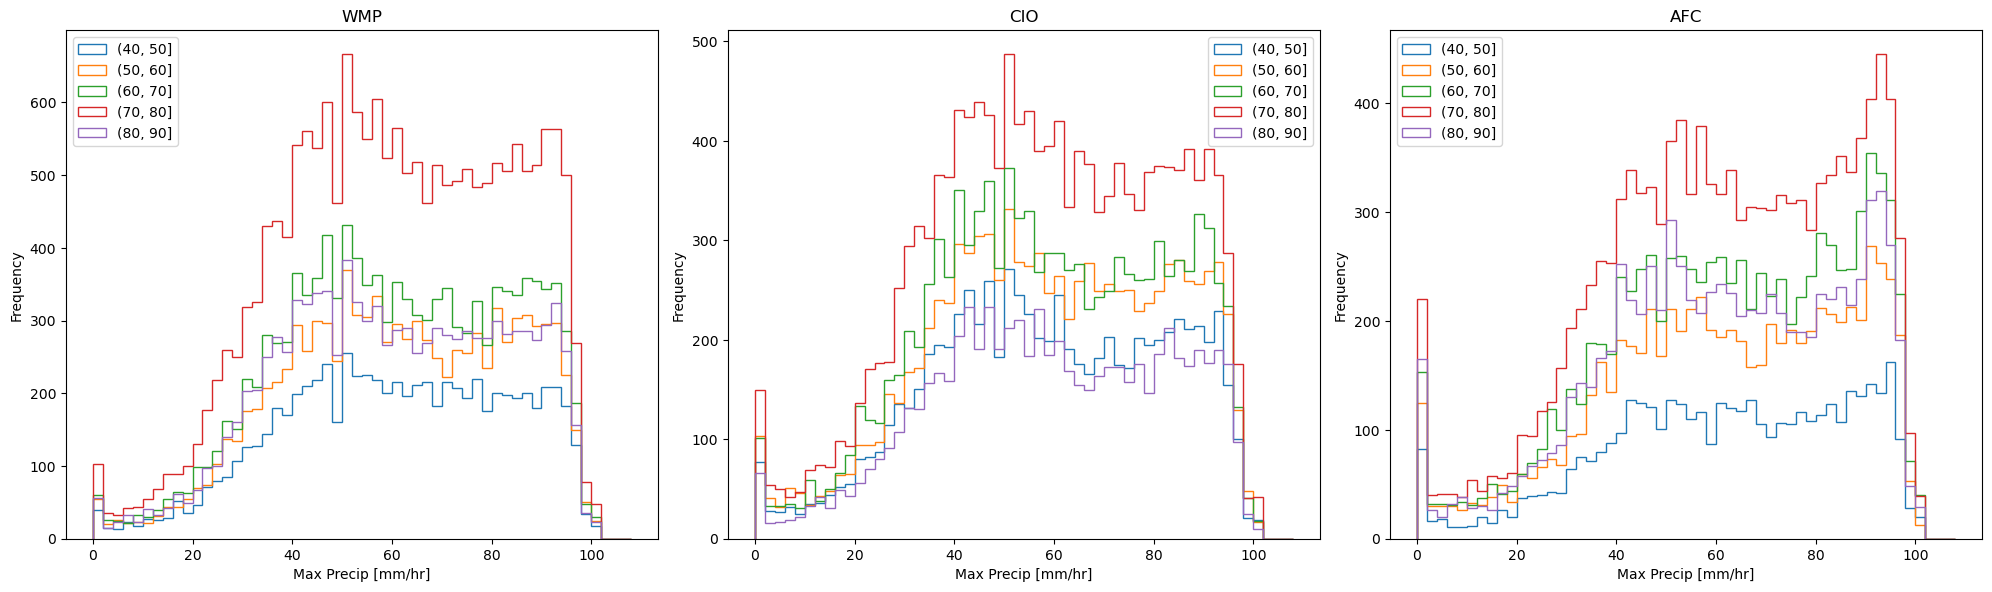

In [120]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 6))

for region, ax in zip([wmp_region(), cio_region(), afc_region()], axs):
    pf_data = load_pf_crh(region.name)
    crh_bins = np.arange(40, 100, 10)
    pf_data['crh_binned'] = pd.cut(pf_data.crh, bins=crh_bins)
    pf_data['data_to_plot'] = 100*pf_data['num_strat_pixels']/pf_data['num_pixels']
    data_grouped = pf_data.groupby('crh_binned')['data_to_plot']


    for (bin_name, group_data)in data_grouped:

        ax.hist(group_data, bins=np.arange(0,110, 2), alpha=1, density=False, histtype='step', label=bin_name)
        ax.set_title(f'CRH Bin: {bin_name}')
        ax.set_ylabel('Frequency')
    ax.legend()
    ax.set_title(region.name)
    ax.set_xlabel('Max Precip [mm/hr]')
fig.tight_layout(pad=1)

In [116]:
pf_data

,Unnamed: 0,pf_filename,observation_time,mean_latitude,mean_longitude,precipitation_centroid_latitude,precipitation_centroid_longitude,num_pixels,num_conv_pixels,num_strat_pixels,...,max_5mmhr_size,num_10mmhr_pixels,max_10mmhr_size,total_precip,total_conv_precip,total_strat_precip,max_precip,crh,crh_binned,data_to_plot
0,12,/home/disk/tc/pangulo/gpm_pf/AFC/2015/02/pf_00...,20150208_12:11:55,0.928022,3.589561,0.977509,3.657825,91.0,9.0,82.0,...,1.0,0.0,0.0,143.616419,37.934913,105.681506,9.599034,55.850108,"(50, 60]",90.109890
1,31,/home/disk/tc/pangulo/gpm_pf/AFC/2015/02/pf_00...,20150213_22:30:49,-3.369512,4.390559,-3.333519,4.199790,1271.0,0.0,1151.0,...,0.0,0.0,0.0,461.790005,0.000000,440.377303,3.077484,64.070897,"(60, 70]",90.558615
2,48,/home/disk/tc/pangulo/gpm_pf/AFC/2015/02/pf_00...,20150218_22:49:43,1.083036,-24.649107,1.081402,-24.687342,56.0,31.0,24.0,...,4.0,6.0,4.0,262.087282,223.903055,37.993436,56.074638,66.374100,"(60, 70]",42.857143
3,74,/home/disk/tc/pangulo/gpm_pf/AFC/2015/02/pf_00...,20150201_02:00:17,8.798809,3.023809,8.693465,3.064623,84.0,19.0,60.0,...,6.0,7.0,2.0,233.363154,95.653774,136.557621,17.798971,74.092875,"(70, 80]",71.428571
4,94,/home/disk/tc/pangulo/gpm_pf/AFC/2015/02/pf_00...,20150209_11:18:29,-2.639183,9.878697,-2.817828,10.018747,906.0,414.0,473.0,...,95.0,137.0,41.0,5647.434236,4536.075545,1107.498874,183.645279,81.023338,"(80, 90]",52.207506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41579,1653,/home/disk/tc/pangulo/gpm_pf/AFC/2020/12/pf_20...,20201208_03:10:46,6.672116,-28.532692,6.656730,-28.539166,52.0,31.0,21.0,...,1.0,1.0,1.0,84.183161,64.494296,19.688865,10.975024,77.655943,"(70, 80]",40.384615
41580,1654,/home/disk/tc/pangulo/gpm_pf/AFC/2020/12/pf_21...,20201218_19:17:46,-5.823837,49.957558,-5.811787,49.949423,86.0,46.0,39.0,...,1.0,0.0,0.0,152.994903,90.539150,62.318851,8.060710,75.392970,"(70, 80]",45.348837
41581,1656,/home/disk/tc/pangulo/gpm_pf/AFC/2020/12/pf_21...,20201216_00:53:22,5.767619,-27.314760,5.793799,-27.323648,105.0,50.0,54.0,...,6.0,5.0,1.0,300.376495,203.000314,97.259757,41.205166,69.810567,"(60, 70]",51.428571
41582,1657,/home/disk/tc/pangulo/gpm_pf/AFC/2020/12/pf_22...,20201208_03:10:46,8.796200,-28.771700,8.741812,-28.928352,500.0,152.0,322.0,...,47.0,53.0,24.0,1828.540594,1306.104116,517.762589,54.137894,80.837819,"(80, 90]",64.400000


0        (80, 81]
1        (45, 46]
2        (78, 79]
3        (68, 69]
4        (78, 79]
           ...   
62080    (45, 46]
62081    (50, 51]
62082    (74, 75]
62083    (52, 53]
62084    (74, 75]
Name: crh, Length: 62085, dtype: category
Categories (64, interval[int64, right]): [(30, 31] < (31, 32] < (32, 33] < (33, 34] ... (90, 91] < (91, 92] < (92, 93] < (93, 94]]